# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-47, 48, 49 (Stand: April 2024)

[Raum F1-08](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Ideales und reales Gas

Name: Vrkic Vorname: Tin E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Nock Vorname: Mika E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Joshua Turnwald

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 03.06.24

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Ideales_und_reales_Gas/README.md).**

In [66]:
# importieren der nötigen Module
import kafe2
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

# definition der Umrechnung von mmHg zu mbar
lam = 1.33322

## Aufgabe 1: Messung des absoluten Nullpunkts mit Hilfe eines Gasthermometers

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Ideales_und_reales_Gas/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie den [Volumenausdehnungskoeffizienten](https://de.wikipedia.org/wiki/Ausdehnungskoeffizient) $\gamma$ von Luft und berechnen Sie daraus die Temperatur des absoluten Nullpunkts $\vartheta_{0}$ in $^{\circ}\mathrm{C}$.
 * Überprüfen Sie den Effekt, den die Ausdehnung des Glaskolbens K als Funktion von $\vartheta$ hat und korrigieren Sie Ihre Messung entsprechend. 
 
---

In [60]:
# Müssen getauscht werden
delta_h_kalt = np.array([18.93,18.89,18.92,18.91])
h_0_kalt = np.array([15.06,15.03,15.06,15.09]) - h_0_kalt

h_0_warm = np.array([18.91, 18.91, 18.90, 18.91])
delta_h_warm = np.array([41.25, 41.97, 41.34, 42.0]) - h_0_warm

# Bestimmung des MItelwertes und der Standartabweichung
p_kalt = lam * np.mean(delta_h_kalt)
p_warm = lam * np.mean(delta_h_warm)

p_std_kalt = lam * np.std(delta_h_kalt)
p_std_warm = lam * np.std(delta_h_warm)



In [67]:
# definieren des Modells
def linear_model(x,m,b):
    return m*x + b 

# erstellen des Fits
fit = kafe2.XYFit(xy_data=(),linear_model)
xy_data = kafe2.XyContainer([0,100],[p_kalt,p_warm])



In diesem Versuch wird mithilfe der Ausdehnung eines Gases der absolute Nullpunkt der Temperaturskala bestimmt. Hierbei wird mithilfe eines Höhenmanometers der Druck in einem festen Volumen bei verschiedenen Temperaturen bestimmt und so der Ausdehnungskoeffizient des Gases und hierüber der Nullpunkt errechnet. 

Gestartet wird mit einem Wasserbad bei $0°C$, in das das Gefäß getunkt wird. Mithilfe eines Fernrohres wird die Höhendifferenz in den Schenkeln errechnet, die über einen Faktor in eine Druckdifferenz umgewandelt werden kann. 

---

## Aufgabe 2: Messung des Adiabatenexponenten $\kappa$

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Ideales_und_reales_Gas/doc/Hinweise-Versuchsdurchfuehrung-a.md).**

 * Bestimmen Sie den Adiabatenkoeffizienten $\kappa$ von Luft (und ggf. Argon) mit Hilfe von zwei verschiedenen Methoden. 
 * Vergleichen Sie die Werte für $\kappa$ von Luft, die Sie mit Hilfe beider Methoden bestimmt haben.  
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

---

### Aufgabe 2.1: Messung nach der Methode von [Clément-Desormes](https://de.wikipedia.org/wiki/Experiment_von_Cl%C3%A9ment-Desormes) 

 * Beschreiben Sie den Prozess zur Bestimmung von $\kappa$ in eigenen Worten. 
 * Führen Sie eine hinreichend lange Messreihe durch, um ein Maß für die Streuung aufgrund statistischer Fluktuationen zu erhalten.
 * Bestimmen Sie aus Ihrer Messreihe $\kappa$ mit entsprechender Unsicherheit $\Delta\kappa$.

---

Volumen: 10l
Druck: 1000mbar +/- 1mbar
same für richardt

In [61]:
h_01_normal = np.array([24.4, 25.2, 24.3])
delta_h1_normal = np.array([7.9, 7.1, 8.1]) - h_01_normal

h_02_normal = np.array([20.1, 20.7, 20.3])
delta_h2_normal = np.array([12.3, 11.7, 11.6]) - h_02_normal

h_01_short = np.array([25.8, 23.9, 25.5])
delta_h1_short = np.array([6.6, 8.2, 6.7]) - h_01_short

h_02_short = np.array([24.7, 23.0, 24.4])
delta_h2_short = np.array([7.6, 9.3, 7.9]) - h_02_short

h_01_long = np.array([25.9, 23.4, 24.2])
delta_h1_long = np.array([6.3, 8.8, 8.0]) - h_01_long

h_02_long = np.array([18.3, 17.9, 18.6])
delta_h2_long = np.array([14.0, 14.4, 13.8]) - h_02_long

h_21_std = .1

### Aufgabe 2.2: Messung nach der Methode von [Rüchardt](https://de.wikipedia.org/wiki/R%C3%BCchardt-Experiment)

**Für diese Aufgabe stehen Ihnen zwei Messaufbauten zur Verfügung. Sie können zwischen einem Aufbau nach der originalen Methode nach Rüchard und einem Aufbau mit elektronischer Datenaufzeichnung und Kolbenprober wählen. Das Messprinzip ist für beide Aufgaben gleich. Nach der originalen Methode von Rüchard bestimmen Sie $\kappa$ nur für Luft. Mit dem Aufbau mit elektronischer Datenaufzeichnung und Kolbenprober bestimmen Sie $\kappa$ für Luft und für das Edelgas Argon ($\mathrm{Ar}$).**

 * Beschreiben Sie den Prozess zur Bestimmung von $\kappa$ in eigenen Worten. 
 * Führen Sie, mit dem gewählten Aufbau, eine geeignete Messreihe zur Bestimmung von $\kappa$ durch.
 * Bestimmen Sie daraus $\kappa$ mit entsprechender Unsicherheit $\Delta\kappa$.

---

In [62]:
periodendauern = np.array([16.34, 15.36, 14.35, 14.46, 16.36, 13.22, 9.82]) # in s
n_perioden = np.array([16, 14, 13, 13, 15, 12, 9])

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

## Aufgabe 3: Dampfdruckkurve von n-Hexan

**Hinweise zu Aufgabe 3 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Ideales_und_reales_Gas/doc/Hinweise-Versuchsdurchfuehrung-a.md).**

 * Bestimmen Sie die Dampfdruckkurve von $1\,\mathrm{mol}$ n-Hexan zwischen Zimmertemperatur und $0^{\circ}\mathrm{C}$. 
 * Schätzen Sie daraus die molare Verdampfungswärme $Q_{\mathrm{M}}$ von n-Hexan ab. 

---

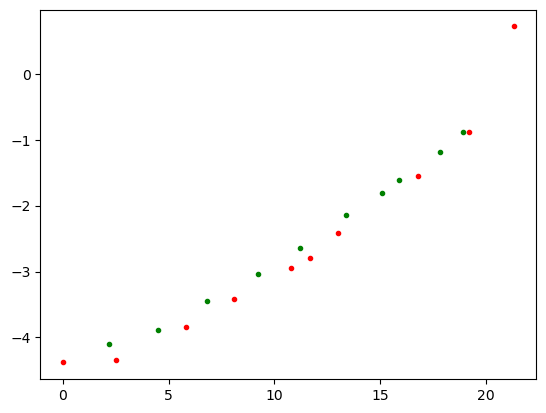

In [79]:
h_03 = (40.11 + 40.83) / 2
delta_h_runter = -(np.array([h_0,41.35,42.02,42.89,43.26,43.42, 43.88, 44.31, 44.81, 44.85]) - h_03)
delta_h_hoch = -(np.array([44.57,44.35,43.92,43.51,43.11,42.61,42.28,42.08,41.65,41.35]) - h_03)

T_runter = np.array([21.3,19.2,16.8,13.,11.7,10.8,8.1,5.8,2.5,0])
T_hoch = np.array([2.2,4.5,6.8,9.2,11.2,13.4,15.1,15.9,17.8,18.9])

plt.plot(T_runter,delta_h_runter,'r.')
plt.plot(T_hoch,delta_h_hoch,'g.')
plt.show()

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---